# Polynomial Regression

## Fit a polynomial to a given data set

In this example for the given dataset, a degree 4 polynomial fitted is of the form 
$$ h_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 $$

Reference: https://towardsdatascience.com/

### Step 1: Import libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset,change the file path accordingly
dataset = pd.read_csv('/Users/rohit/Documents/ML Lab/data/position_salaries.csv')

In [2]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45110
1,Business Analyst,1,45300
2,Business Analyst,1,45120
3,Business Analyst,1,45200
4,Business Analyst,1,45100


In [3]:
X = dataset.iloc[:, 1:2].values # use "Level" field as X (independent) variable, ignore "Position" field, as each position corresponds to unique level id
y = dataset.iloc[:, 2].values # use "Salary" as target dependent variable

### Step 2: Prepare and visualize the given data set

In [4]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
print(X_train.shape)
print(X_test.shape)

(36, 1)
(10, 1)


### Step 3: Create and train degree 4 polynomial regression model

In [6]:
# Fitting Polynomial Regression to the dataset with degree=4

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=4)

Xtrain_poly_feature = poly_feature.fit_transform(X_train)
Xtest_poly_feature = poly_feature.transform(X_test)




In [7]:
# Degree 4 polynomial featured (1, x, x^2, x^3, x^4)
Xtrain_poly_feature

array([[1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 8.000e+00, 6.400e+01,

In [8]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly_feature, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 4: Visualize the results

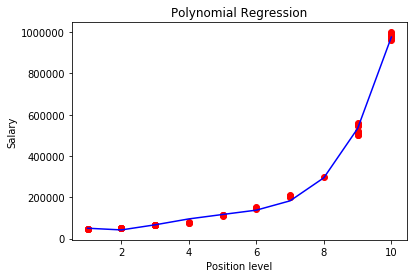

In [9]:
# Visualizing the Polymonial Regression results

plt.scatter(X, y, color='red')
plt.plot(X,pol_reg.predict(poly_feature.transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Step 5: Prediction and Evaluation

In [10]:
# Predicting a new result with Polymonial Regression

test_pred=pol_reg.predict(Xtest_poly_feature)

### Step Model evaluation

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(y_test, test_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(y_test, test_pred))

Mean squared error = 292497588.36
Variance score = 0.93
